# Описание проекта

Я — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Моя задача — разобраться в причинах и помочь компании выйти в плюс.


Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.


Предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.


**Описание данных:**<br>

Структура visits_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.


Структура orders_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.


Структура costs_info_short.csv:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

####  Для начала загрузим библиотеки 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import datetime as dt
from scipy import stats as st
from datetime import datetime, timedelta
import warnings
warnings.simplefilter('ignore')

In [2]:
try:    
    visits = pd.read_csv('/datasets/visits_info_short.csv', sep=',')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv', sep=',')
try:
    orders = pd.read_csv('/datasets/orders_info_short.csv', sep=',')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv', sep=',')
try:
    costs = pd.read_csv('/datasets/costs_info_short.csv', sep=',')
except:
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv', sep=',')

#### Посмотрим на сами данные, в каком формате представлены и что находится в самих данных.

In [3]:
#Напишем простую функцию для просмотра информации
def information(data):
    display(data.head(5))
    display(data.info())
    print('Количество дубликатов:',data.duplicated().sum())
    print("Количество Пропусков в столбцах:\n", data.isna().sum())

In [4]:
information(visits)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Количество дубликатов: 0
Количество Пропусков в столбцах:
 User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64


In [5]:
information(orders)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

Количество дубликатов: 0
Количество Пропусков в столбцах:
 User Id     0
Event Dt    0
Revenue     0
dtype: int64


In [6]:
information(costs)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Количество дубликатов: 0
Количество Пропусков в столбцах:
 dt         0
Channel    0
costs      0
dtype: int64


 **Структуры данных**

*Структура visits:*
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

*Структура orders:*
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

*Структура costs:*
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.



#### ***Пропуски не обнаружены, посмотрим чуть глубже и займемся обработкой данных. Уберем пробелы в названиях и приведем к змеиному регистру, приведем параметры даты и времени к корректному типу***

In [7]:
#Чтобы вручную через rename не переименовывать каждый столбец, напишем функцию
for i in [visits, orders, costs]:
    i.columns = [x.lower().replace(' ', '_') for x in i.columns.values]

In [8]:
# преобразуем данные о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [9]:
#проверим по через датафрейм visits
display(visits)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


**Промежуточный итог:**
Данные приведены к необходимому формату, пропуски и явные дубликаты не обнаружены

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Создадим функцию get_profiles 
для создания пользовательских профилей

In [10]:
def get_profiles(visits, orders, costs):
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавим факт покупки
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органического трафик равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    return profiles

#### Функция *get_retention* 
Для расчета удержания пользователей

In [11]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # добавляем покупку в передаваемый список dimensions
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw  = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция *get_conversion*
Она необходима для для расчета *Conversion Rate*

In [12]:
def get_conversion(profiles, orders, observation_date, horizon_days, dimensions=[], ignore_horizon=False):
 
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # найдем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавим данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитаем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['dt']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # построим таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )

        # посчитаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)

        # вычислим размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # объединим таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # разделим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)

        # исключим все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстановим размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получим таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получим таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 
    

#### Функция *get_ltv()*
Чтобы рассчитать необходимый нам показатель ROI ( LTV разделить на CAC), добавим сразу САС и ROI в функцию к LTV (чтобы не переписывать функцию дважды).

In [13]:
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 4. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 5. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 6. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 7. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 8. Считаем LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,добавляем параметры dimensions 
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        #Шаг 9. Считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # Шаг 10. Считаем ROI
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # Шаг 11. Добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # Шаг 12. В финальной таблице оставляем размеры когорт, CAC и ROI в пределах горизонта анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    # Шаг 13. Получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

####   Функция *filter_data()* 
Она потребуется при построении графиков для сглаживания датафрейма.

In [14]:
# В функции применяем скользящее среднее
# df - наш датафрейм
# window - ширина окна сглаживания
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция *plot_retention()*
Функция визуализации данных по удержанию пользователей

In [15]:
def plot_retention(retention, retention_history, horizon, window=7):
    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Функция plot_conversion()

In [16]:
def plot_conversion(conversion, conversion_history, horizon, window=7):
    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()
    

#### Функция plot_ltv_roi

In [17]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Вывод по пункту 2:**<br>
Необходимые функции прописаны, переходим далее

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [18]:
#Добавим профили пользователей
profiles = get_profiles(visits, orders, costs)
information(profiles)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


None

Количество дубликатов: 0
Количество Пропусков в столбцах:
 user_id             0
first_ts            0
channel             0
device              0
region              0
dt                  0
month               0
payer               0
acquisition_cost    0
dtype: int64


#### Определим максимальную и минимальную дату привлечения пользователей

In [19]:
print(f'Минимальная дата привлечения пользователей:', profiles['dt'].min())
print(f'Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


**Промежуточный вывод по п.3.1:**<br>
Минимальная дата привлечения пользователей: 2019-05-01<br>
Максимальная дата привлечения пользователей: 2019-10-27<br> 
Даты соответствуют заявленным ранее (по ТЗ)

#### Узнаем страну большинства пользователей (платящих и неплатящих). Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [20]:
#Сделаем сводную таблицу
popular_country_pivot = (profiles.pivot_table(index='region',
                            values='user_id',
                            aggfunc='nunique')
                   .sort_values(by='user_id', ascending=False)
                   .rename(columns = {'user_id':'unique_users', 'region':'country'})
                   .reset_index())

#Добавим долю пользователей, чтобы в дальнейшем можно было сравнить 
#платящих и не платящих к общей доли пользователей, округлим до 2 знаков после запятой
popular_country_pivot['share_of_all_users'] = round(popular_country_pivot['unique_users']/
                                                    (popular_country_pivot['unique_users'].sum())*100, 2)
display(popular_country_pivot)
popular_country_pivot['unique_users'].sum()

,region,unique_users,share_of_all_users
0,United States,100002,66.66
1,UK,17575,11.72
2,France,17450,11.63
3,Germany,14981,9.99


150008

In [21]:
payers_pivot_country = (
    profiles.loc[profiles['payer'] == True].pivot_table(index = 'region', 
                                                        values = 'user_id', 
                                                        aggfunc = 'nunique')
    .sort_values(by='user_id', ascending = False)
    .rename(columns={'user_id': 'unique_users'})
    .reset_index()
)
# доля платящих пользователей по странам
payers_pivot_country['payers_%'] = round(payers_pivot_country['unique_users']
                                         /popular_country_pivot['unique_users']*100, 2)
display(payers_pivot_country)

,region,unique_users,payers_%
0,United States,6902,6.90
1,UK,700,3.98
2,France,663,3.80
3,Germany,616,4.11


Добавим график для наглядности

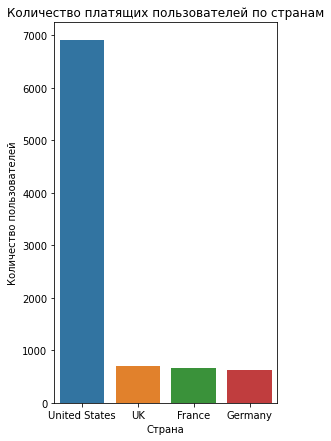

In [22]:
plt.figure(figsize=(4, 7))
plt.title('Количество платящих пользователей по странам')
sns.barplot(x=payers_pivot_country['region'], y=payers_pivot_country['unique_users'])
plt.ylabel('Количество пользователей')
plt.xlabel('Страна');

**Промежуточный вывод:**<br>
Можно заметить что основной трафик у приложения Procrastinate Pro+ идет с Американского рынка, где доля пользователей составляет 2/3 от общего количества. Что касается "платящих пользователей", то по количеству США имеют явное преимущество и платящие составляют 6,9% от общего количества пользователей по стране. Великабритания, Франция и Германия находятся по "платежеспособности" на одном уровне.

#### Определим какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [23]:
pivot_device = (
    profiles.pivot_table(index = 'device',
                         values = 'user_id', 
                         aggfunc = 'nunique')
    .sort_values(by='user_id', ascending = False)
    .rename(columns={'user_id': 'unique_users'})
    .reset_index()
    .merge(profiles[profiles['payer']==True]
           .groupby('device')['user_id']
           .nunique()
           .reset_index(),
           on = 'device',
           how = 'left')
)
pivot_device.set_axis(['device', 'total_users', 'payers'], axis='columns', inplace=True)
pivot_device['share_%'] = round(pivot_device['total_users']/pivot_device['total_users'].sum()*100, 2)
pivot_device['payer_rate_%'] = round(pivot_device['payers'] / pivot_device['total_users'] *100, 2)
pivot_device.sort_values(by='payer_rate_%', ascending=False)
pivot_device = pivot_device[['device','total_users','share_%','payers','payer_rate_%']]
pivot_device

,device,total_users,share_%,payers,payer_rate_%
0,iPhone,54479,36.32,3382,6.21
1,Android,35032,23.35,2050,5.85
2,PC,30455,20.30,1537,5.05
3,Mac,30042,20.03,1912,6.36


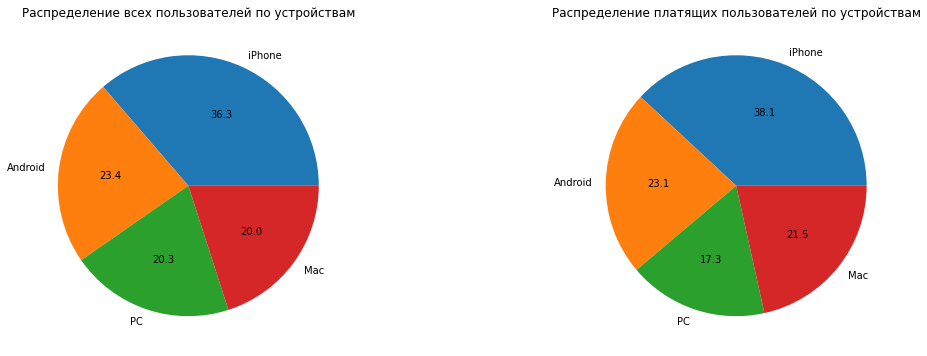

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6),  squeeze=False)
ax[0][0].pie(pivot_device.total_users, labels=pivot_device.device, autopct='%.1f')
ax[0][0].set(title='Распределение всех пользователей по устройствам')
ax[0][1].pie(pivot_device.payers, labels=pivot_device.device, autopct='%.1f')
ax[0][1].set(title='Распределение платящих пользователей по устройствам')

plt.show()

Здесь можно заметить неоспоримое лидерство Iphone как среди платящих пользователей, так и среди всех пользователей. PC пользователя являются самыми неохотными покупателями. Однако сравнивая соотношение покупателей к пользователям мы видим от 5 до 6,4% и можно заметить, что две лидирующие позиции занимают Iphone  и Mac, что может нам сказать о более удачной интеграции приложения в экосистему Apple.

#### Изучим трафик пользователей и рекламные источники привлечения. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [25]:
pivot_channels = (
    profiles.pivot_table(index = 'channel',
                         values = 'user_id', 
                         aggfunc = 'nunique')
    .sort_values(by='user_id', ascending = False)
    .rename(columns={'user_id': 'unique_users'})
    .reset_index()
    .merge(profiles[profiles['payer']==True]
           .groupby('channel')['user_id']
           .nunique()
           .reset_index(),
           on = 'channel',
           how = 'left')
)
pivot_channels.set_axis(['channel', 'total_users', 'payers'], axis='columns', inplace=True)
pivot_channels['share_%'] = round(pivot_channels['total_users']/pivot_channels['total_users'].sum()*100, 2)
pivot_channels['payer_rate_%'] = round(pivot_channels['payers'] / pivot_channels['total_users'] *100, 2)
pivot_channels = pivot_channels[['channel','total_users','share_%','payers','payer_rate_%']]
pivot_channels.sort_values(by='payer_rate_%', ascending=False)
pivot_channels

,channel,total_users,share_%,payers,payer_rate_%
0,organic,56439,37.62,1160,2.06
1,FaceBoom,29144,19.43,3557,12.20
2,TipTop,19561,13.04,1878,9.60
3,OppleCreativeMedia,8605,5.74,233,2.71
4,LeapBob,8553,5.70,262,3.06
5,WahooNetBanner,8553,5.70,453,5.30
6,RocketSuperAds,4448,2.97,352,7.91
7,MediaTornado,4364,2.91,156,3.57
8,YRabbit,4312,2.87,165,3.83
9,AdNonSense,3880,2.59,440,11.34


Для наглядности используем круговую диаграмму

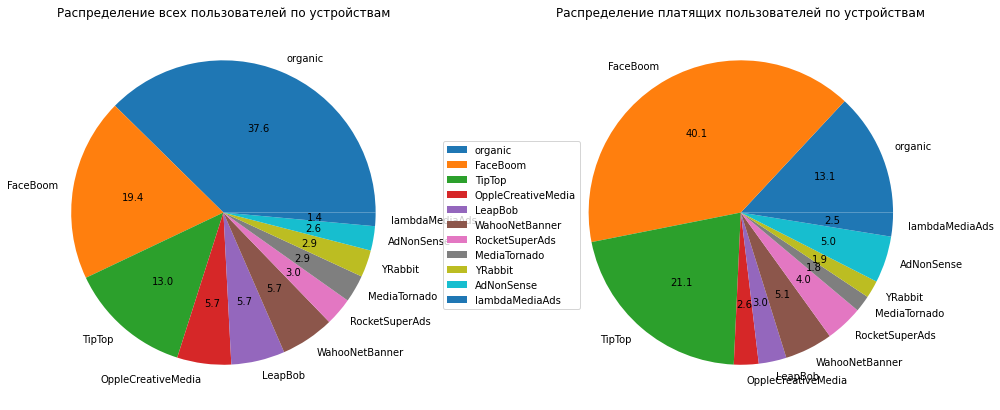

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (17, 7),  squeeze=False)
ax[0][0].pie(pivot_channels.total_users, labels=pivot_channels.channel, autopct='%.1f',)
ax[0][0].set(title='Распределение всех пользователей по устройствам')
ax[0][1].pie(pivot_channels.payers, labels=pivot_channels.channel, autopct='%.1f')
ax[0][1].set(title='Распределение платящих пользователей по устройствам')
plt.legend(
    bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
    loc = 'best', labels = pivot_channels['channel'] )
plt.show();

Органический трафик является основным притоком пользователей. Рассматривая платных пользователей, наибольшее количество привлекли TipTop и FaceBoom + органический трафик (13,1%), что не удивительно,ведь этот вариант привлекает больше трети уникальных пользователей.<br> Наиболее продуктивные каналы привлечения по соотношению платных пользователей к общему потоку:<br>
1. FaceBoom 12.2% платных пользователей
2. AdNonSense 11.34% платных пользователей
3. lambdaMediaAds 10.47% платных пользователей

**На основе анализа пользовательских профилей можно сделать следующие выводы:**<br>
- Целевая аудитория приложения находится в США (66,66%)
- 36,3% от общего числа пользователей предпочитают пользоваться приложением с Iphone. Рассматривая платных пользователей, среди них приложением на Iphone пользуются 38,1%
- Основной поток пользователей идет "органикой" (37,6%)
- Больше всего платных пользователей привлекли TipTop и FaceBoom. На двоих 61,2% от числа платных пользователей.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Исключим органический трафик, ведь на него нет затрат. Посчитаем общие расходы и расходы по каждому источнику

In [27]:
profiles = profiles.query('channel != "organic"')

In [28]:
display(costs.groupby('channel')['costs'].sum().sort_values(ascending=False).reset_index())
print('Общие затраты на рекламу составили:', costs['costs'].sum())

,channel,costs
0,TipTop,54751.30
1,FaceBoom,32445.60
2,WahooNetBanner,5151.00
3,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,LeapBob,1797.60
7,lambdaMediaAds,1557.60
8,MediaTornado,954.48
9,YRabbit,944.22


Общие затраты на рекламу составили: 105497.30000000002


**Промежуточный вывод:**<br>
*Получаем наибольшие затраты на рекламу в TipTop и FaceBoom 54 751.30 и 32 445.60р соответственно*

#### Построим график изменения расходов в зависимости от источника и времени

Для начала добавим столбцы с месяцем и номером недели

In [29]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].astype('datetime64[M]')
costs['week'] = costs['dt'].dt.isocalendar().week
costs.sample(7)

,dt,channel,costs,month,week
56,2019-06-26,FaceBoom,210.10,2019-06-01,26
355,2019-10-23,MediaTornado,5.28,2019-10-01,43
745,2019-05-26,YRabbit,10.20,2019-05-01,21
153,2019-10-01,FaceBoom,258.50,2019-10-01,40
1178,2019-08-07,LeapBob,11.13,2019-08-01,32
13,2019-05-14,FaceBoom,92.40,2019-05-01,20
281,2019-08-10,MediaTornado,3.84,2019-08-01,32


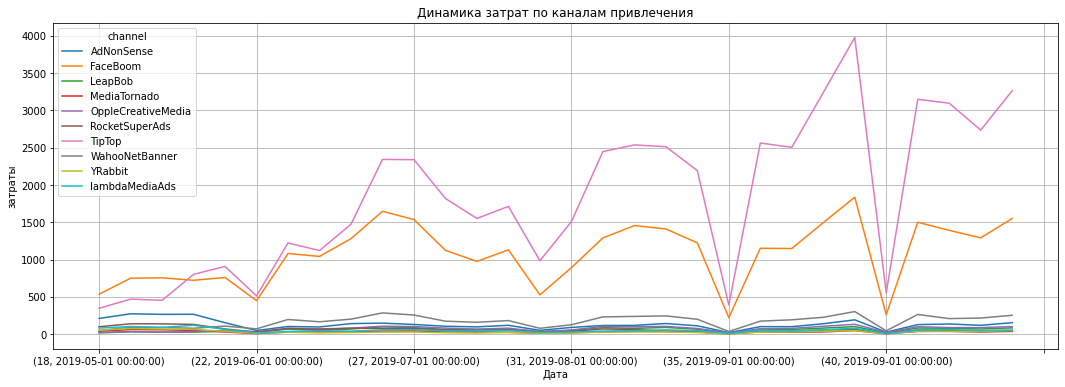

In [30]:
costs.pivot_table(
    index={'week','month'}, columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, figsize=(18, 6))
plt.ylabel('затраты')
plt.xlabel('Дата')
plt.title('Динамика затрат по каналам привлечения')
plt.show()

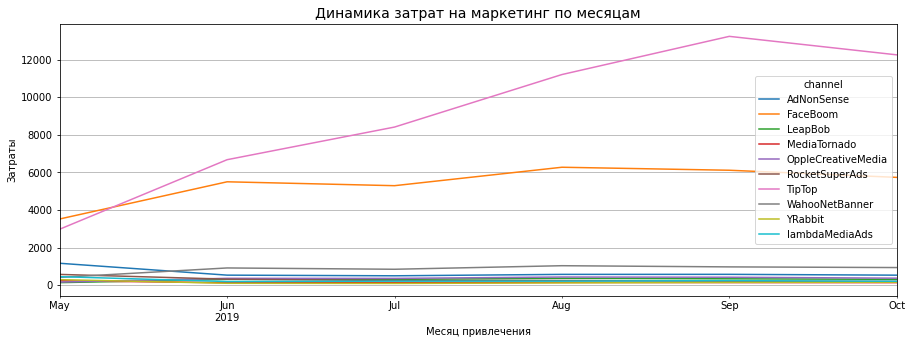

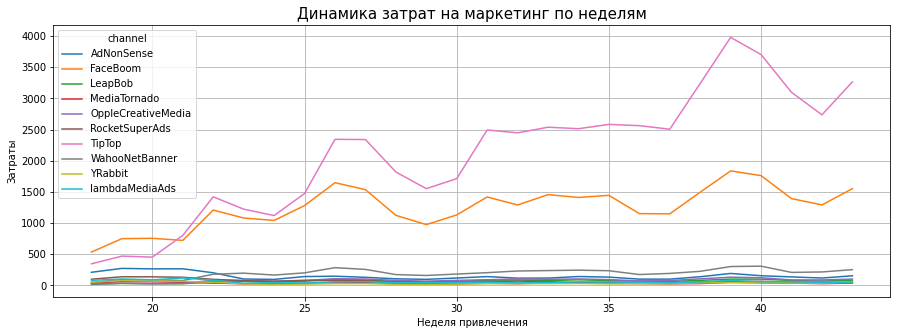

In [31]:
#Сделаем две сводные таблицы для отрисовки динамики
costs_in_dynamic = (
    costs.pivot_table(
        index = 'month',
        columns='channel',
        values = 'costs',
        aggfunc = 'sum')
)
# график разбивкой по месяцам
costs_in_dynamic.plot(figsize=(15, 5), grid=True)
plt.title('Динамика затрат на маркетинг по месяцам', fontsize=14)
plt.xlabel('Месяц привлечения')
plt.ylabel('Затраты')

costs_in_dynamic_week = (
    costs.pivot_table(
        index = 'week',
        columns='channel',
        values = 'costs',
        aggfunc = 'sum')
)
# график с разбивкой по дням
costs_in_dynamic_week.plot(figsize=(15, 5), grid=True)
plt.title('Динамика затрат на маркетинг по неделям', fontsize=15)
plt.xlabel('Неделя привлечения')
plt.ylabel('Затраты')
plt.show()


*Сделал два варианта графиков, для более удобного формата рассмотрения*

**Промежуточный вывод:**<br>
Наибольшие затраты видно по каналам привлечения TipTop и Faceboom.За весь исследуемый период наблюдается скачкообразный рост стоимости по каналу TipTop. Заметен пик на 39 неделе (конец сентября - начало октября). Возможна смена формата привлечения (т.е. с показов на клики или регистрации)

#### Рассчитаем САС через profiles
Для того чтобы посчитать стоимость привлечения одного клиента (САС) необходимо расходы на рекламу разделить на количество приведенных пользователей (размер когорты). Сначала рассчитаем по всем каналам, затем по каждому

In [32]:
print('Средний CAC на одного пользователя по всем каналам привлечения составил:',
      round(profiles['acquisition_cost'].mean(), 2))

Средний CAC на одного пользователя по всем каналам привлечения составил: 1.13


In [33]:
cac_per_channel = (
    profiles.pivot_table(
        index = 'channel',
        values = 'acquisition_cost',
        aggfunc = 'mean')
    .sort_values(by='acquisition_cost', ascending=False)
    .rename(columns={'acquisition_cost': 'mean_cac'}).reset_index()
)
cac_per_channel

,channel,mean_cac
0,TipTop,2.799003
1,FaceBoom,1.113286
2,AdNonSense,1.008054
3,lambdaMediaAds,0.724802
4,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
6,OppleCreativeMedia,0.250000
7,YRabbit,0.218975
8,MediaTornado,0.218717
9,LeapBob,0.210172


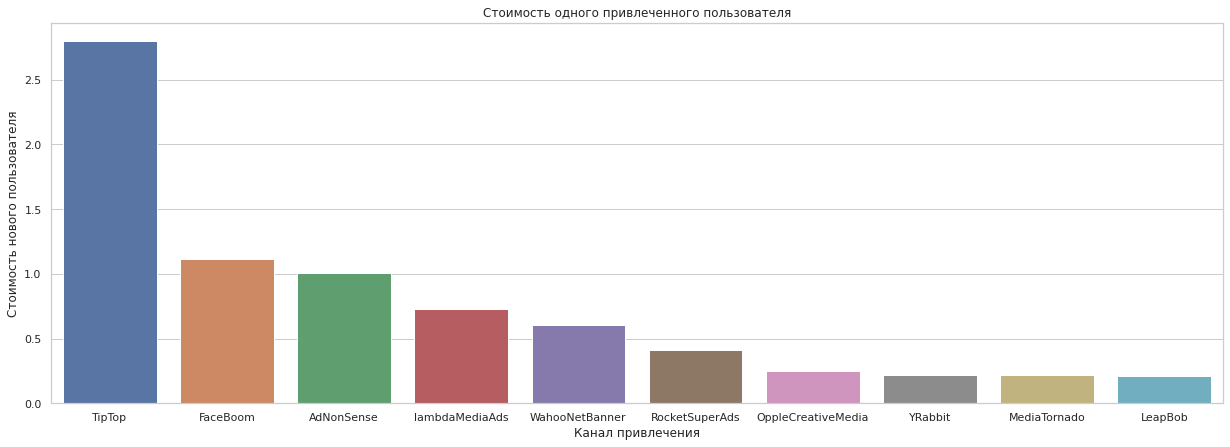

In [34]:
plt.figure(figsize=(21, 7))
sns.set_theme(style='whitegrid')
plt.title('Стоимость одного привлеченного пользователя')
sns.barplot(x=cac_per_channel['channel'], y=cac_per_channel['mean_cac'])
plt.ylabel('Стоимость нового пользователя')
plt.xlabel('Канал привлечения')
plt.show();

**Промежуточный вывод:**<br>
Всего на привлечение новых пользователей было потрачено 105497.3р, из них 54751.30р на привлечение через канал TipTop и 32445.60р на канал FaceBoom. Самые дорогие пользователи пришли с каналов:<br>
TipTop - стоимость за пользователя  2.799<br>
FaceBoom - стоимость за пользователя 1.113<br>
AdNonSense - стоимость за пользователя 1.008

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [35]:
#По ТЗ горизонт анализа две недели, момент анализа 1 ноября 2019 года
# Ранее были исключены органические пользователи
horizon_days = 14
observation_date = datetime(2019, 11, 1).date()
#Переводим dt обратно в нужный формат
profiles['dt'] = pd.to_datetime(profiles['dt'])

#### Окупаемость рекламы
#### Для начала посмотрим на общую окупаемость

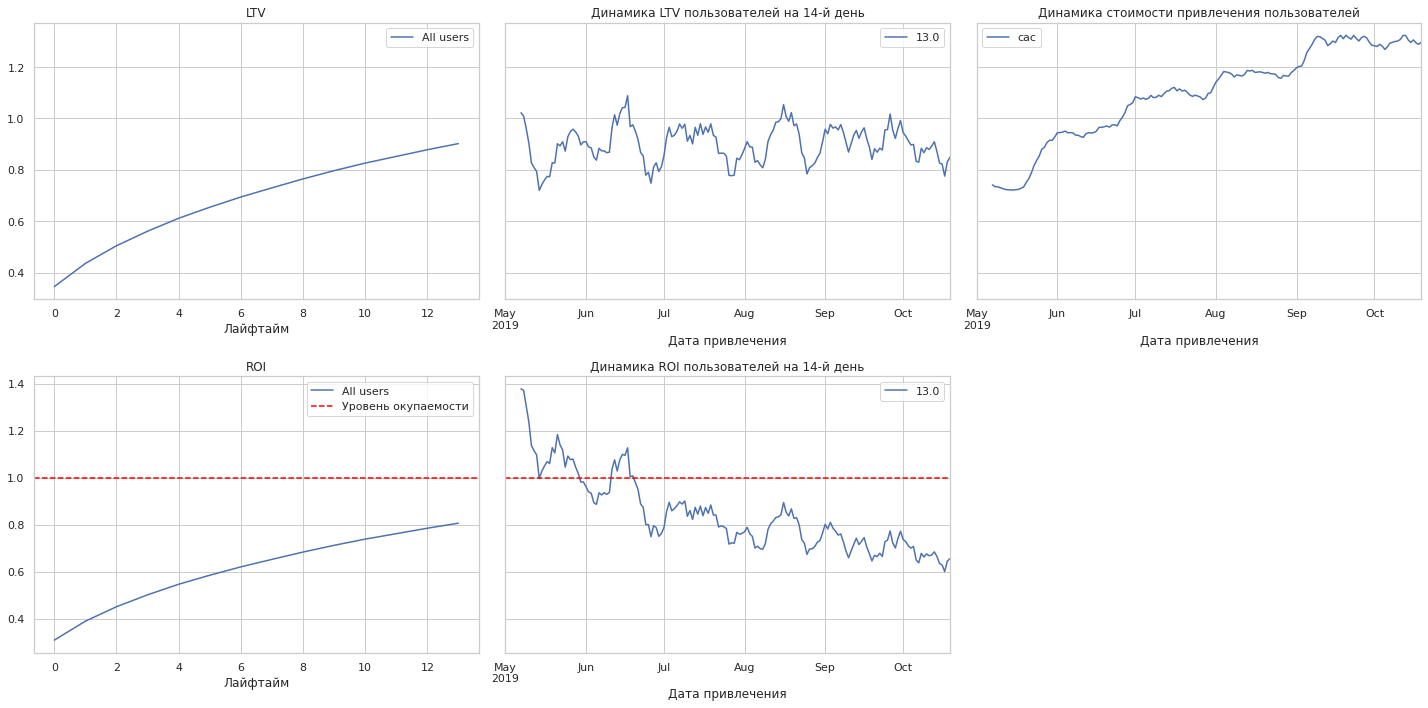

In [36]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**По представленным графикам можно сделать выводы:**
- Реклама не окупается.
- На 12 день ROI подбирается на уровень в 80%, что ниже уровня окупаемости
- C июня месяца ROI не рентабелен
- Динамика ROI постоянно снижается
- CAC растет скачкообразно, но постоянно. Можно сделать вывод,что рекламные кампании проходят регулярно и бюджет на рекламу увеличивается

##### Посмотрим на окупаемость по каналам привлечения пользователей

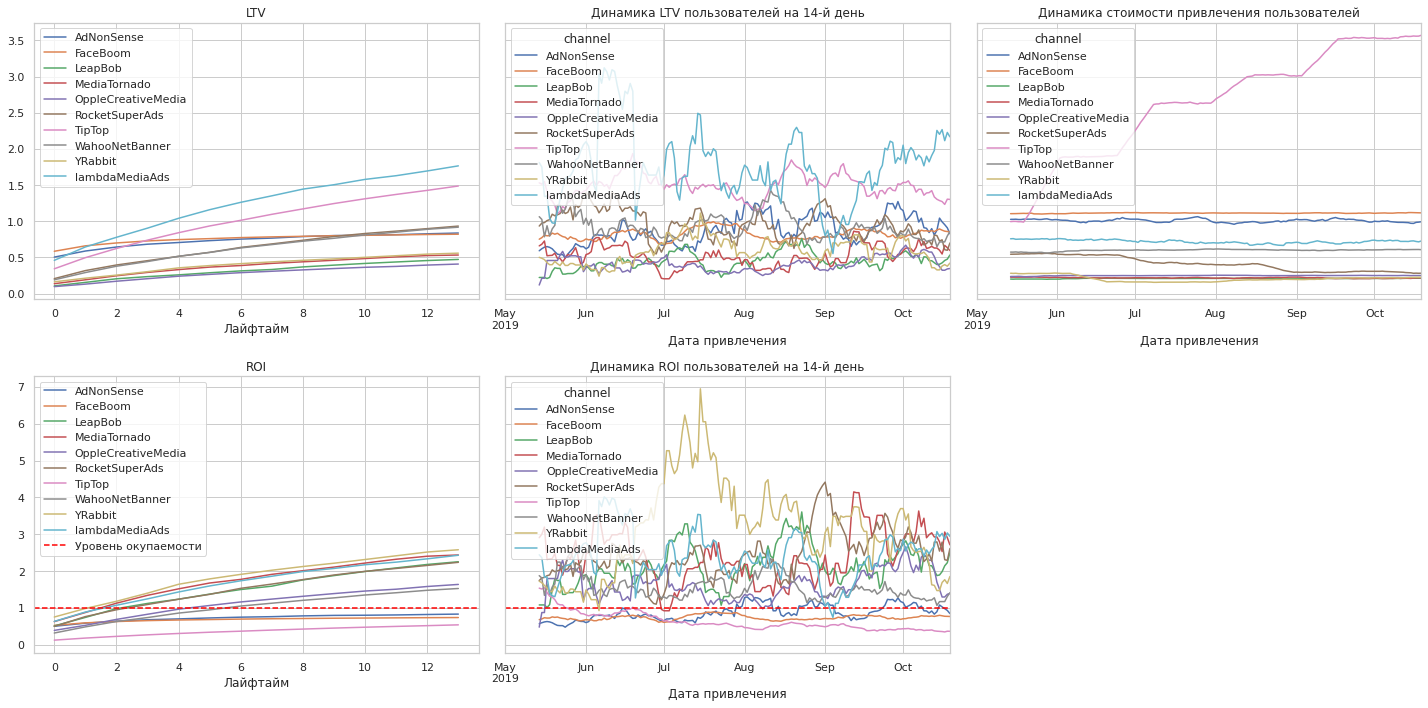

In [37]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**По представленным графикам можно сделать выводы:**<br>
- Так как у нас ТЗ, что окупаемость пользователя 14 дней, по графику можно заметить, что только три канала привлечения не выходят на окупаемость - это TipTop, FaceBoom и AdNonSense <br>
- На рост рекламного бюджета оказывает сильное влияние постоянно растущий CAC по каналу TipTop.<br>
- Лучше всего окупаются YRabbit, MediaTornado и lambdaMediaAds.

##### Посмотрим на окупаемость по используемому устройству

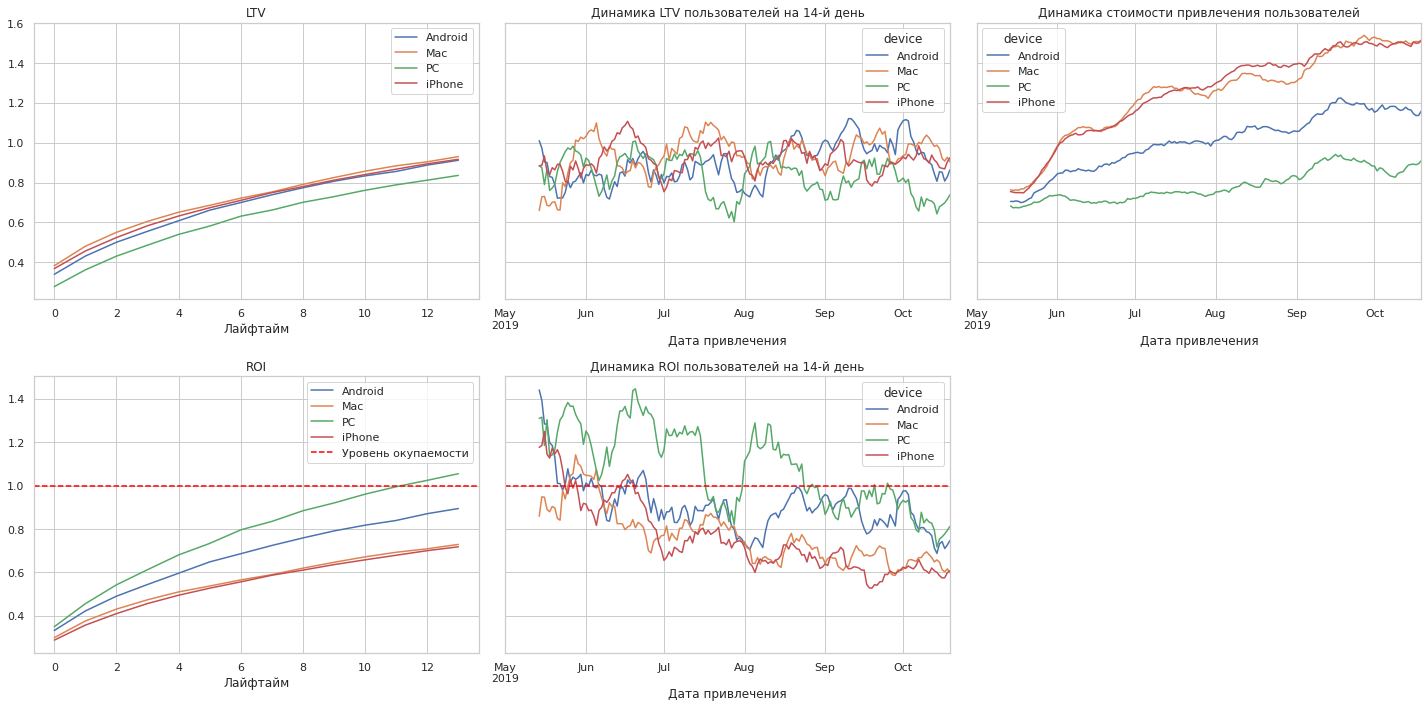

In [38]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**По представленным графикам можно сделать выводы:**<br>
- На окупаемость выходят только привлеченные пользователи персональных компьютеров<br>
- Рекламные бюджеты растут на всех устройствах, но на iPhone и Mac это выраженно сильнее.

##### Посмотрим на окупаемость по регионам пользователей

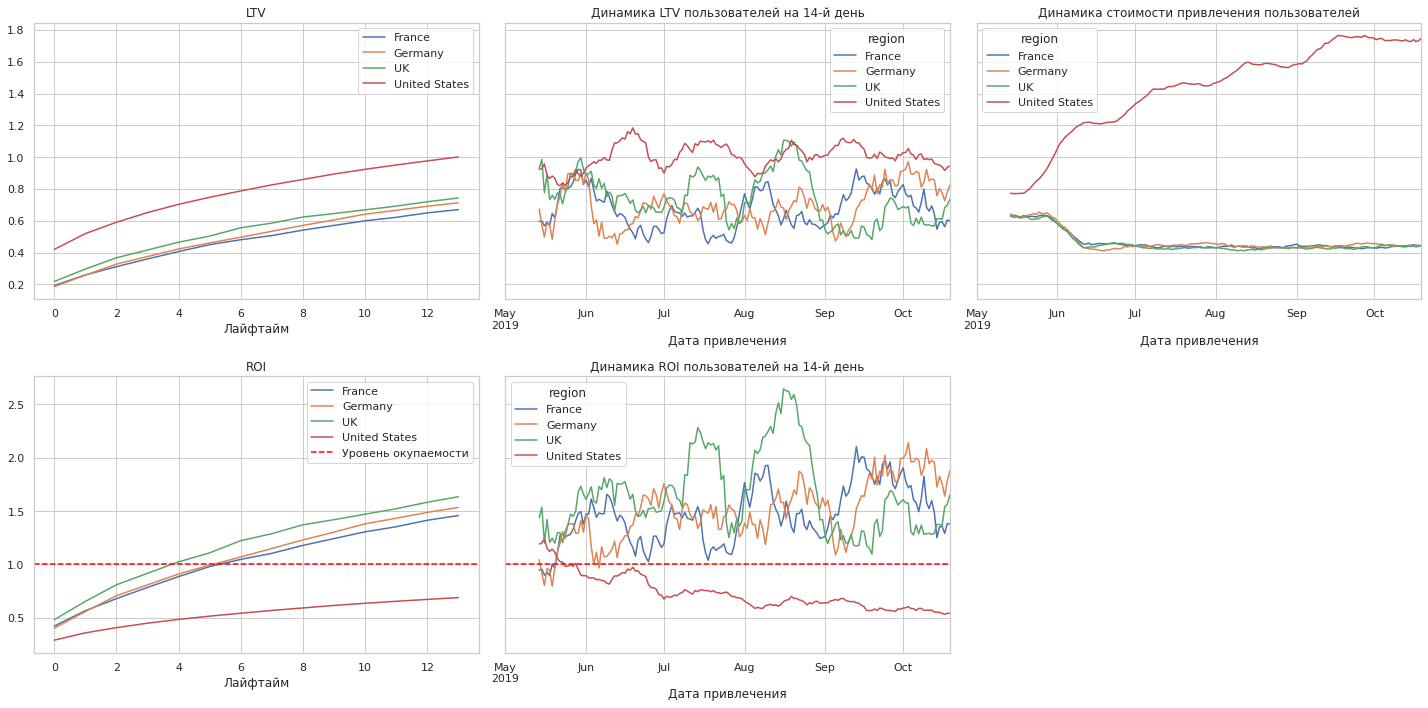

In [39]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**По представленным графикам можно сделать выводы:** 
- Реклама не окупается в США. 
- Динамика ROI показывает явное падение окупаемости в США и растет стоимость привлечения пользователя 
- Стоимость привлечения практически одинакова для Европейских стран.

#### Конверсия пользователей
Проверим конверсию пользователей и динамику её изменения 

##### Конверсия по каналам привлечения пользователей

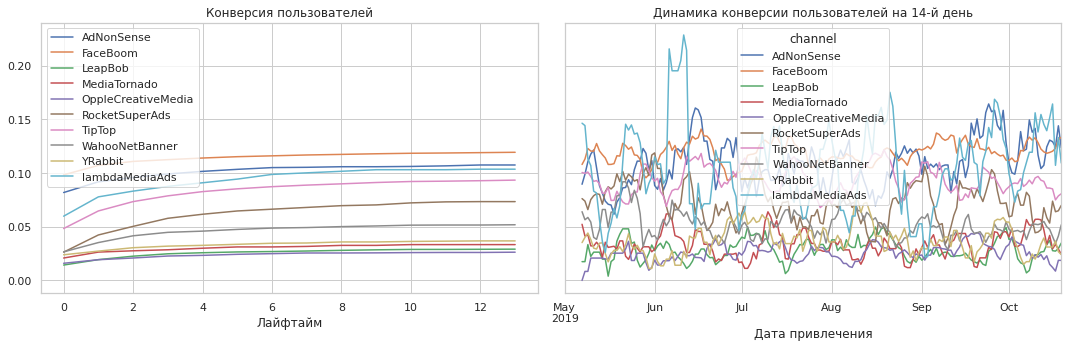

In [40]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**По представленным графикам можно сделать вывод, что пользователи со всех каналов привлечения конвертируются достаточно хорошо и стабильно.**

##### Конверсия в зависимости от устройства пользователя

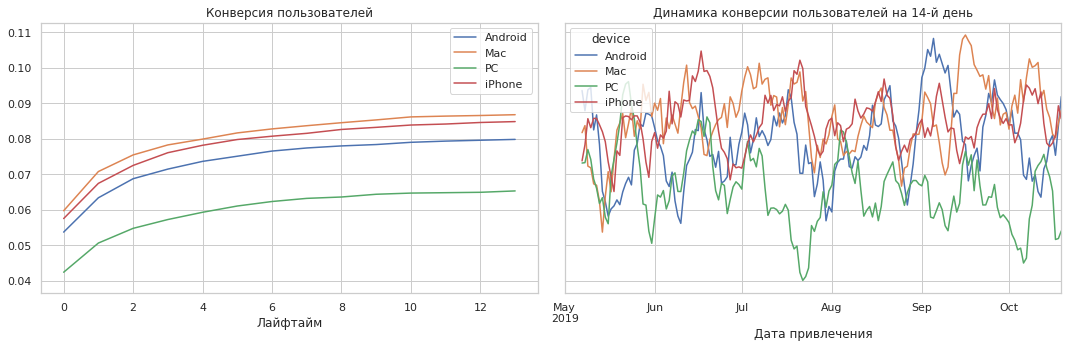

In [41]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**По представленным графикам можно сделать вывод, что  пользователи Android,Mac и iPhone конвертируются очень хорошо. У PC платформы в динамике заметны сильные колебания**

##### Конверсия в зависимости от региона

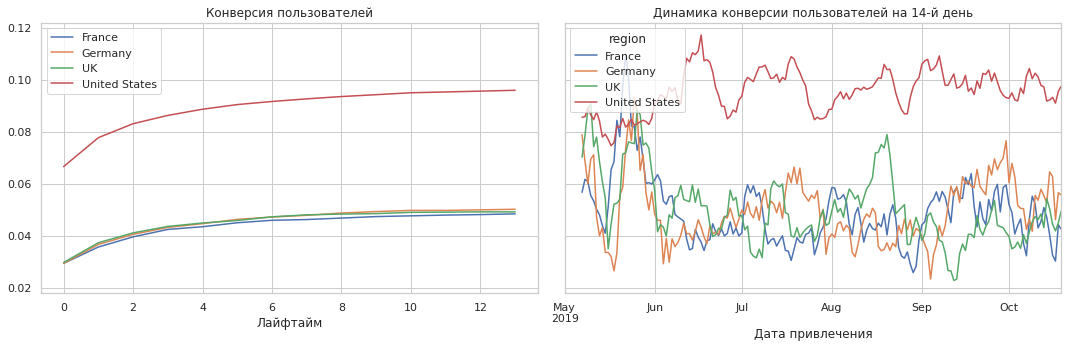

In [42]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**По представленным графикам можно сделать выводы:** 
- пользователи из США конвертируются очень хорошо, причём постоянно,однако реклама не окупается и скорее всего проблема с удержанием пользователя. 
- Европейские страны примерно на одном уровне

#### Графики удержания пользователей

##### удержания пользователей в зависимости от канала привлечения

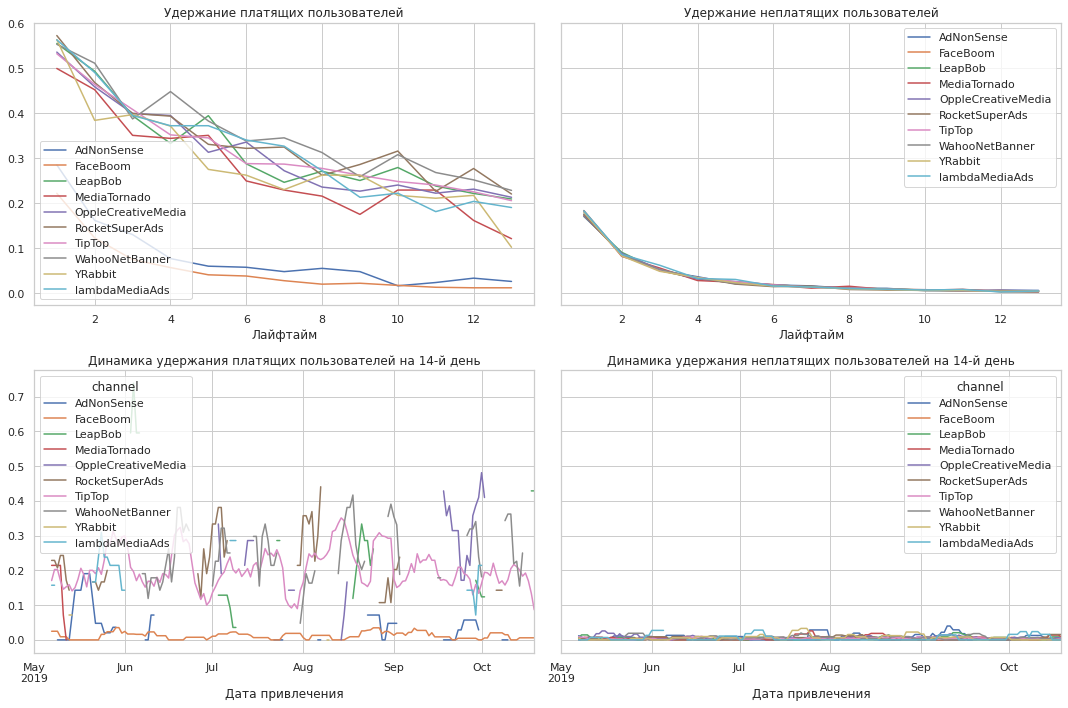

In [43]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**По представленным графикам можно сделать вывод, что пользователей ,пришедших с каналов AdNonSense и FaceBoom, очень трудно удержать. Скорее всего это не целевая аудитория приложения**

##### Удержание пользователя в зависимости от устройства 

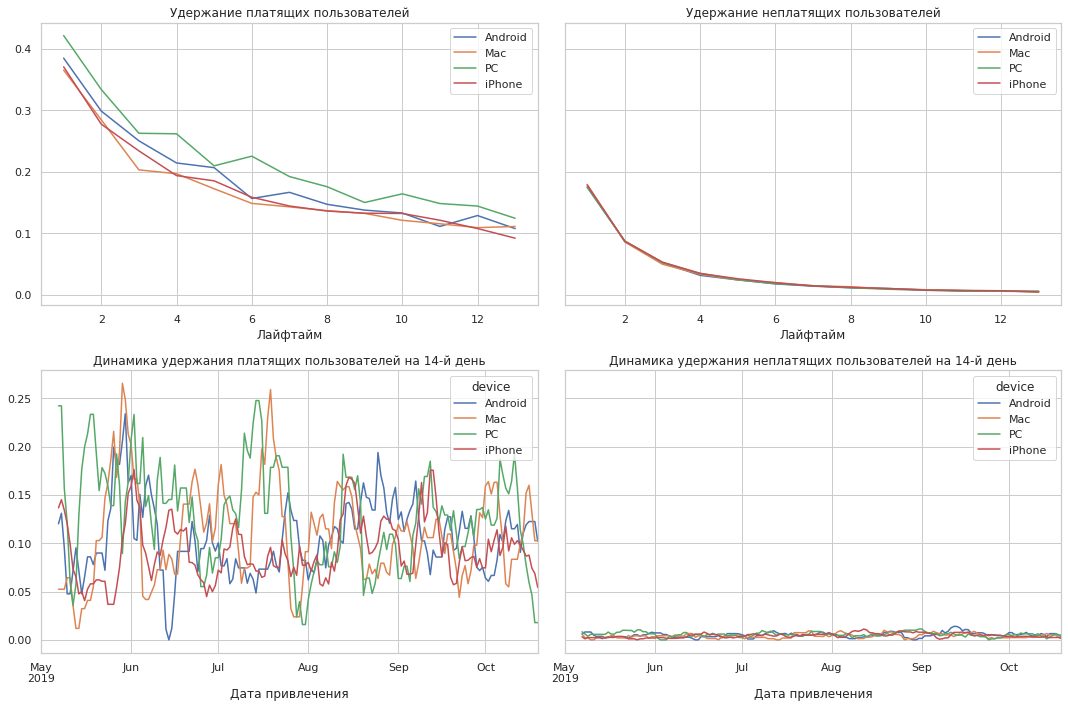

In [44]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**По представленным графикам можно сделать вывод, что удержание у пользователей iPhone и Mac и у пользователй Android и PC примерно равное.**

##### Удержание пользователя в зависимости от региона

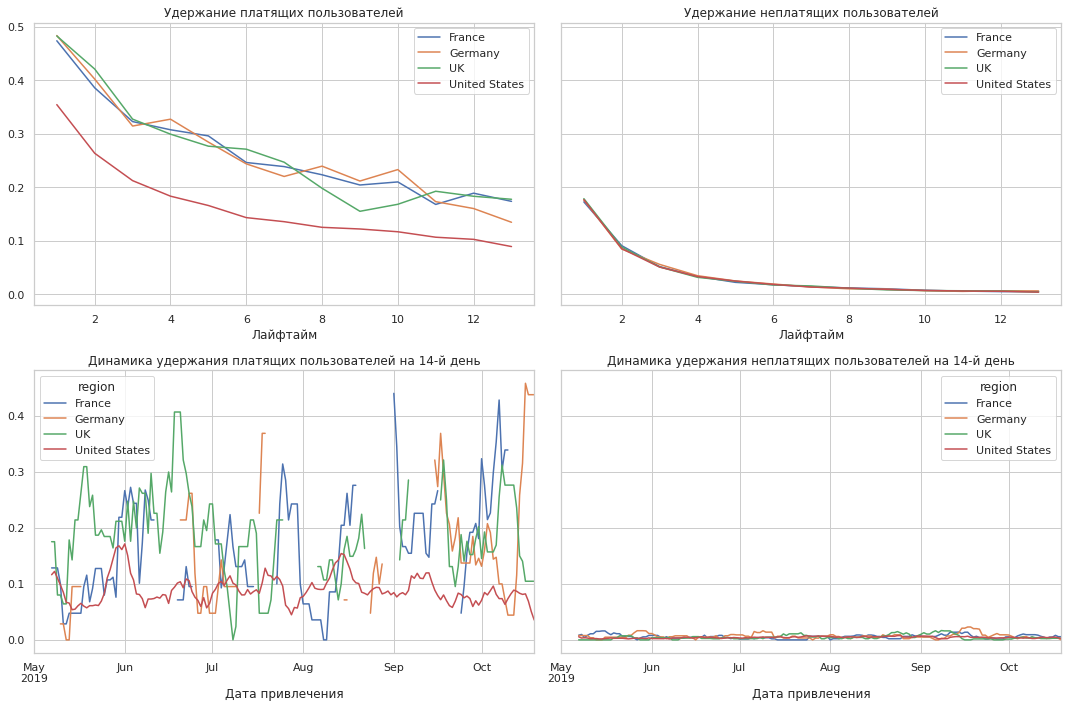

In [45]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**По представленным графикам можно сделать выводы:**
- Пользователя США удержать сложнее
- Европейские странны примерно на одном уровне, но заметны высокие колебания в динамике.

#### Вывод по разделу 
Реклама не окупается, неудачная рекламная компания в США (где сосредоточено 66.7% пользователей с наибольшей среди всех стран долей платящих пользователей) нацелена не на ту аудиторию, пользователя удержать очень тяжело. Также удержать платящего пользователя не позволяют каналы привлечения AdNonSense и FaceBoom. Свое влияние оказывает покупка рекламы в AdNonSense, FaceBoom и TipTop, которая не окупается, хотя и дает в общей сложности 35% пользователей (из которых 11.1% платящие). Рекламный бюджет постоянно растет с целью поддержания рынка США с помощью канала TipTop на платформы iPhone и Mac.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Проблемы неэффективного привлечения пользователей:**
- Реклама не окупается, неудачная рекламная компания в США (где сосредоточено 66.7% пользователей с наибольшей среди всех стран долей платящих пользователей) нацелена не на ту аудиторию, пользователя удержать очень тяжело. 
- Два основных канала рекламы не окупаются, новый пользователь обходится слишком дорого (туда направлено 82,5% от общего бюджета на рекламу).
- Неверный выбор каналов привлечения пользователей и трат на маркетинг - основной фактор неэффективности привлечения пользователей.
- Малое сосредоточение на Европейском рынке, который более стабилен в плане удержания платящего пользователя.
- Органический трафик занимает большую долю среди каналов привлечения, однако качество этого траффика оставляет желать лучшего. 


**Рекомендации**
- Необходимо отказаться от площадок AdNonSense, FaceBoom и TipTop, где последние две слишком дорогие и неэффективные.
- Увеличить финансирование рекламных каналов RocketSuperAds, WahooNetBanner и lambdaMediaAds. У этих каналов хорошая окупаемость и показателей конверсии.
- Нужно организовать рекламу, ориентированную на PC пользователей. Платформа может задерживать платящего клиента, но видно, что  рекламная кампания не была сфокусирована на данную платформу и заметны сильные просадки по привлечению пользователей.
- Все платформы устройств способны удержать платящих пользователей, если учитывать популярность яблочной продукции Mac и IPhone на рынке США.
- Больше сосредоточиться на рекламе в Европе, компания привлекает слишком много пользователей из США, которых тяжело удержать.
- Рассматривая отдельно рынок США. Там закупается реклама у MediaTornado, RocketSuperAds, TipTop, YRabbit и FaceBoom. Последний канал привлечения имеет наибольшую конверсию среди площадок, представленных в этом регионе, но наименьшее удержание. Проблем с "переходами" на приложение нет. Так как приложение Procrastinate Pro+ является развлекательным, возможно возрастной контингент пользователей данной площадки не подходит.
- Faceboom приносит большое количество пользователей и в принципе 40% от платных пользователей и 20% от общего количества.
пришли с этой площадки. Данный канал привлечения приносит много пользователей, однако удержать именно "платников" не получается из чего выливается большая цена за 1 пользователя. Скорее всего приходит нецелевая аудитория, которую мы не можем удержать. Как вариант, можно направить новый рекламный баннер, который будет лучше описывать приложение Procrastinate Pro+. 